<a href="https://colab.research.google.com/github/Sadikshya-dhakal/AI/blob/main/DS_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



This code builds and evaluates a **Support Vector Machine (SVM) classifier** on the **Iris dataset**. Only the first two features are used for simplicity and visualization. The data is split into training (70%) and testing (30%) sets. An SVM with an **RBF kernel** is trained on the training data, predictions are made on the test set, and the model’s **accuracy** is calculated to measure how well it classifies the iris species.


In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for visualization
y = iris.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', gamma=0.7, C=1.0)

In [6]:
# Train the SVM
svm.fit(X_train, y_train)

SVC(gamma=0.7)

In [7]:
# Make predictions
y_pred = svm.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80




This code visualizes the **decision boundary** of the trained SVM model on the Iris dataset. A mesh grid is created over the feature space, and the model predicts the class for each point. The contourf plot shows the regions classified for each class, while the training data points are overlaid with different colors for actual classes. This helps to visually understand how the **SVM with RBF kernel** separates the different iris species based on the features.


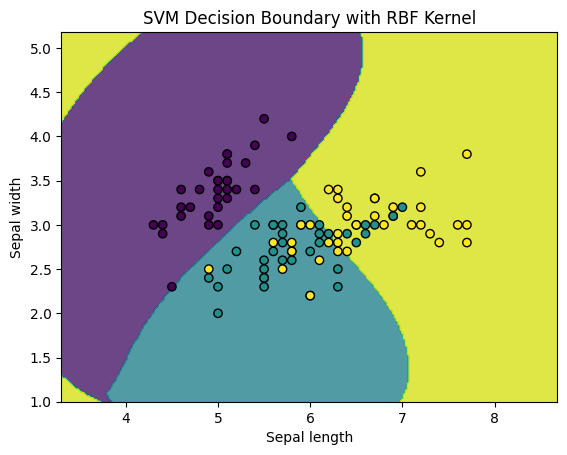

In [9]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.show()

plot_decision_boundary(X_train, y_train, svm)

#Nadaraya Watson's Regression

Nadaraya-Watson regression is a **non-parametric method** that estimates the value of a response variable by taking a **weighted average of nearby observed values**, where weights are determined by a **kernel function** based on the distance between points. Closer points have higher influence, and the **bandwidth** controls the smoothness of the estimate. This method allows flexible modeling of relationships without assuming a specific functional form.


In [10]:
np.random.seed(0)

X = np.linspace(0, 10, 25)
Y = np.sin(X) + np.random.normal(0, 0.3, len(X))


In [11]:
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)


In [12]:
def nadaraya_watson(x_query, X, Y, h):
    weights = gaussian_kernel((x_query - X) / h)
    return np.sum(weights * Y) / np.sum(weights)


In [13]:
X_test = np.linspace(0, 10, 200)
h = 0.6   # bandwidth

Y_pred = np.array([nadaraya_watson(x, X, Y, h) for x in X_test])


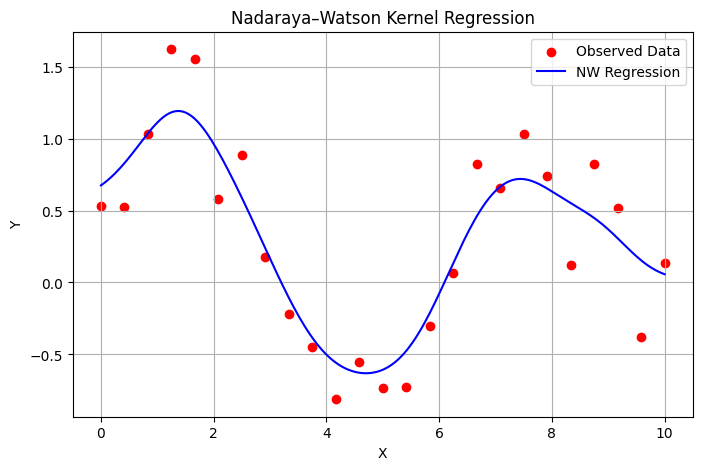

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='red', label='Observed Data')
plt.plot(X_test, Y_pred, color='blue', label='NW Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nadaraya–Watson Kernel Regression')
plt.legend()
plt.grid(True)
plt.show()


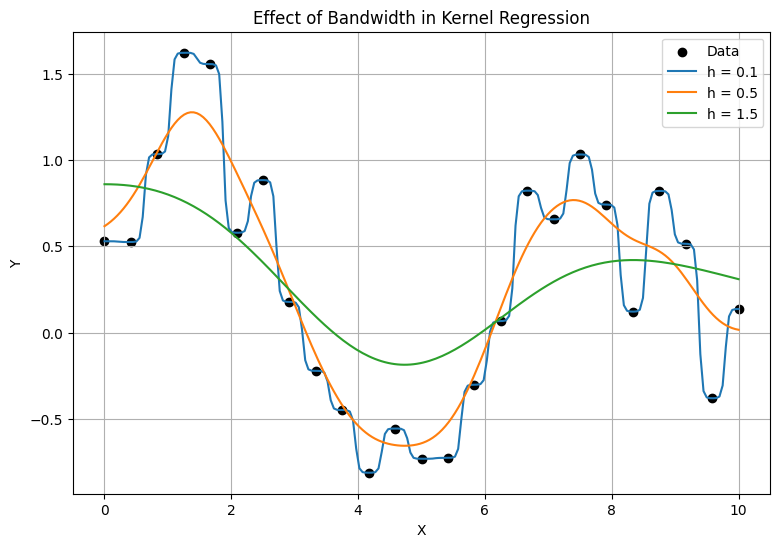

In [15]:
bandwidths = [0.1, 0.5, 1.5]

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='black', label='Data')

for h in bandwidths:
    Y_pred = [nadaraya_watson(x, X, Y, h) for x in X_test]
    plt.plot(X_test, Y_pred, label=f'h = {h}')

plt.title('Effect of Bandwidth in Kernel Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Nadaraya-Watson regression provides a flexible, non-parametric way to estimate relationships between variables. By weighting nearby points using a kernel function, it captures patterns in the data without assuming a fixed model, making it useful for smoothing and prediction in situations where the underlying relationship is unknown or nonlinear.